<a href="https://colab.research.google.com/github/AviFeygin/EECS-4080/blob/main/Project_3_Predict_Red_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()


import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sea

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#for balancing
from sklearn.utils import resample,shuffle

#regularization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

knn =  KNeighborsClassifier()

import math


from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier
from random import randint


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout

sea.set()

import warnings
warnings.filterwarnings("ignore")
sea.set_style("darkgrid")



## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled. 

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

the goal is to predict wether wine is good based on given features. We will implement a linear regression model to tell us how changes in those variables affect quality and also a predictive classification model to then tell us if a wine is good based on given information.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

### Data Collection

**Q3. From where do we get our data?**

from the UCI machine learning dataset

In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data_wine = pd.read_csv(url, delimiter=";")

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

 Portugal

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

 It can help producers focus on the factors that affect the variables that define a good wine the most. Meaning capital can be employed more efficiently

*TODO*
<li>Check the shape of data, and the datatypes of the features</li>
<li>Understand the data by carrying out any steps that you think are necessary</li>

In [4]:
display(data_wine)
#size
size = int(data_wine.shape[1])
print( "we have "+str(size)+" entries")
print(data_wine.columns)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

we have 12 entries
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [5]:
data_wine.shape
bool_series = data_wine.duplicated()
display(bool_series.sum())
data_wine.drop_duplicates(inplace=True)
bool_series = data_wine.duplicated()
display(bool_series.sum())

240

0

### Data Preparation

#### Explore the dataset further
*TODO*



<li>Check for outliers if any and handle them</li>

<li>Implement Correlation heatmap</li>

<li>Check the distribution of data using histograms</li>

<li>Prepare the data for modeling by carrying out any steps that you think are necessary</li>

In [6]:
#is any value null
print("Are there any null data points?")
display(data_wine.isnull().values.any())
if (data_wine.isnull().values.any() == True):
 display(data_wine.isnull().sum())

Are there any null data points?


False

How is the data balanced?

In [7]:

data_wine.describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
data_wine.quality.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

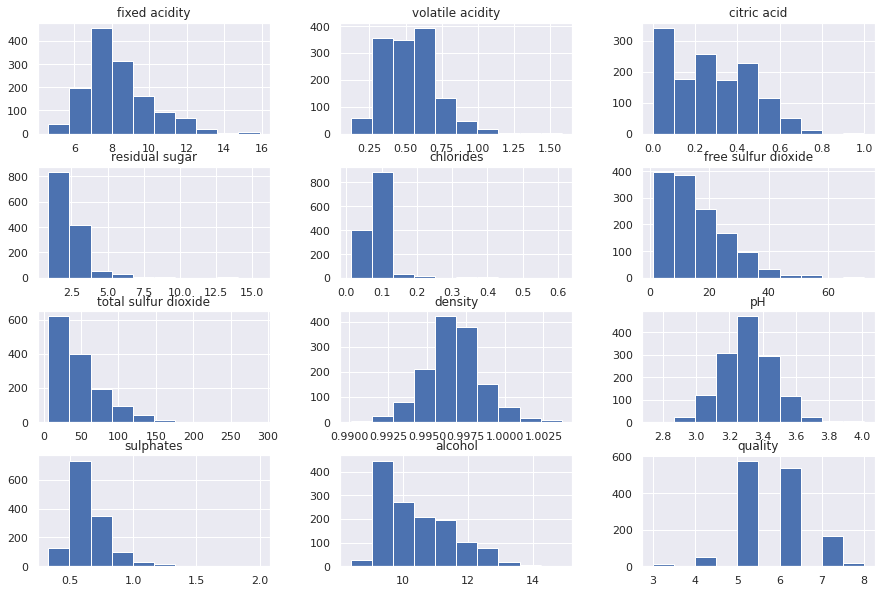

In [9]:
data_wine.hist(figsize = [15, 10] )

plt.show()


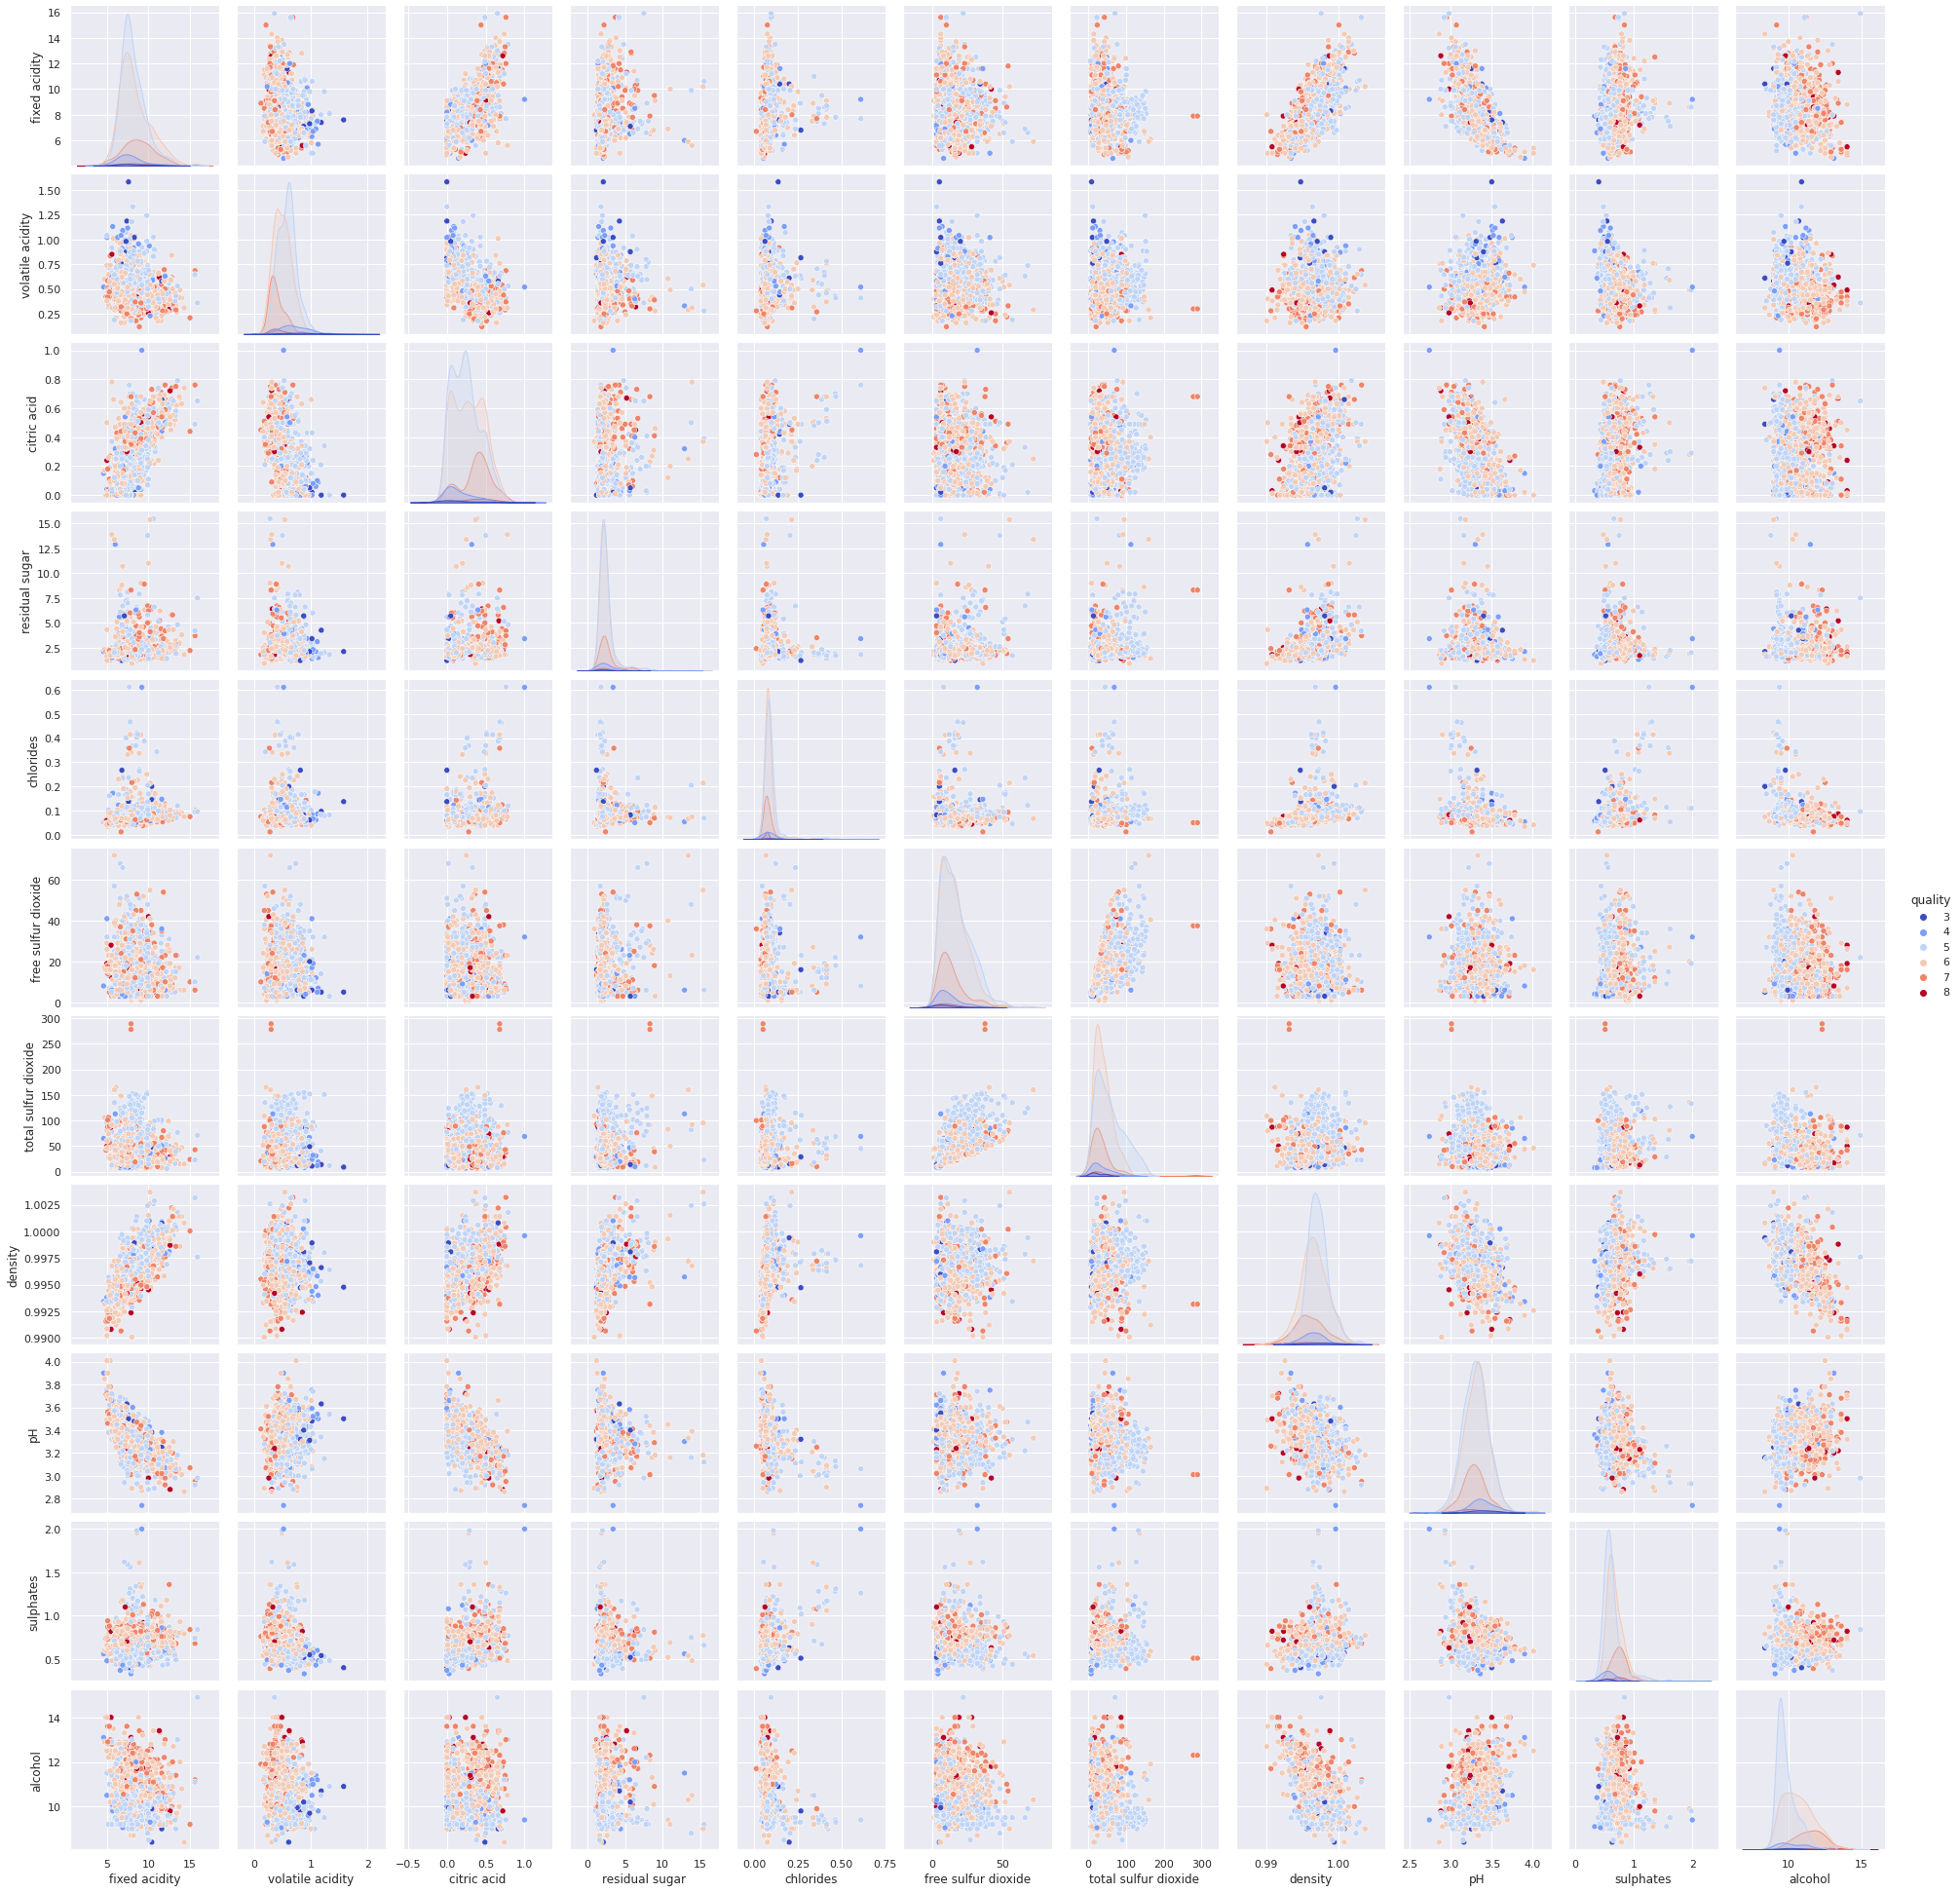

In [10]:
sea.pairplot(data=data_wine, hue="quality", palette = 'coolwarm')

I am not dropping quality in this case because we want to see if the quality is positively correlated to any of the variables. in this case(quite ironically) the quality is actually correlated to the amount of alcohol quite strongly! otheriwse it seems it is negatively or neutrally correlated to everything else

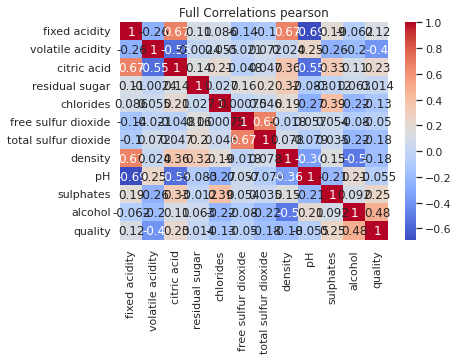

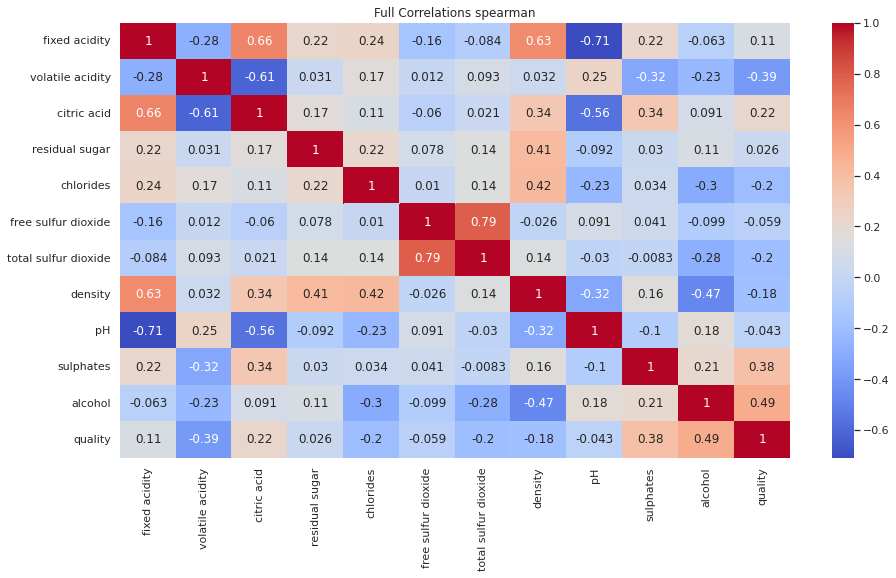

In [11]:
sea.heatmap(data_wine.corr(method = 'pearson'), annot=True, cmap ="coolwarm").set(title='Full Correlations pearson')
sea.set(rc = {'figure.figsize':(15,8)})
plt.grid(False)
plt.show()


sea.heatmap(data_wine.corr(method = 'spearman'), annot=True, cmap ="coolwarm").set(title='Full Correlations spearman')
sea.set(rc = {'figure.figsize':(15,8)})
plt.grid(False)
plt.show()

we can see from this that the strongest correlations in absolute terms,  to quality are in order alcohol, (-)volatile acidity, sulphates, and then citric acid. The rest have correlations in absolute terms less than. .2

however volatile acidity and citric acid are strongly negatively correlated themselves which means that we may need to pick one of them so as to not overfit.

sulphates are moderately correlated with citric acid as well

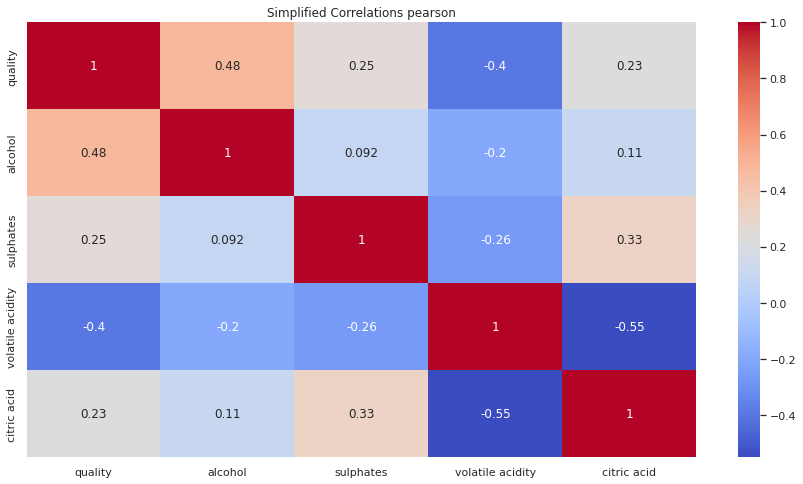

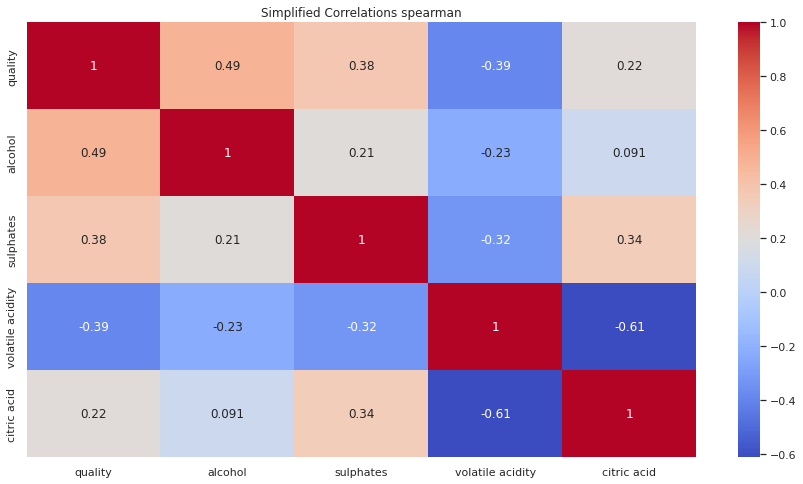

In [12]:
sea.heatmap(data_wine[['quality', 'alcohol','sulphates', 'volatile acidity', 'citric acid']].corr(method = 'pearson'), annot=True, cmap ="coolwarm").set(title='Simplified Correlations pearson')
sea.set(rc = {'figure.figsize':(15,8)})
plt.grid(False)
plt.show()


sea.heatmap(data_wine[['quality', 'alcohol','sulphates', 'volatile acidity','citric acid']].corr(method = 'spearman'), annot=True, cmap ="coolwarm").set(title='Simplified Correlations spearman')
sea.set(rc = {'figure.figsize':(15,8)})
plt.grid(False)
plt.show()

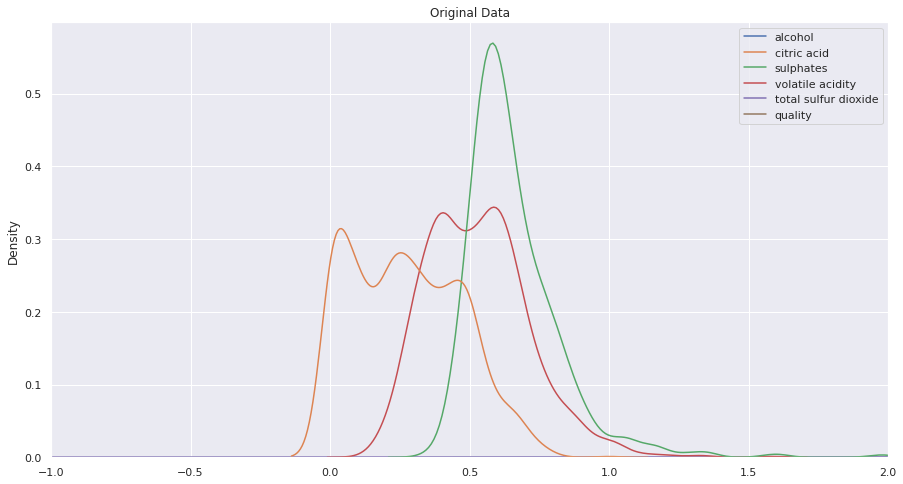

In [13]:
#show the original data
fig, ax = plt.subplots()
sea.kdeplot(data = data_wine[['alcohol','citric acid', 'sulphates','volatile acidity', 'total sulfur dioxide', 'quality' ]]).set_title('Original Data')
ax.set_xlim(-1,2)
sea.set(rc = {'figure.figsize':(15,8)})
plt.show()

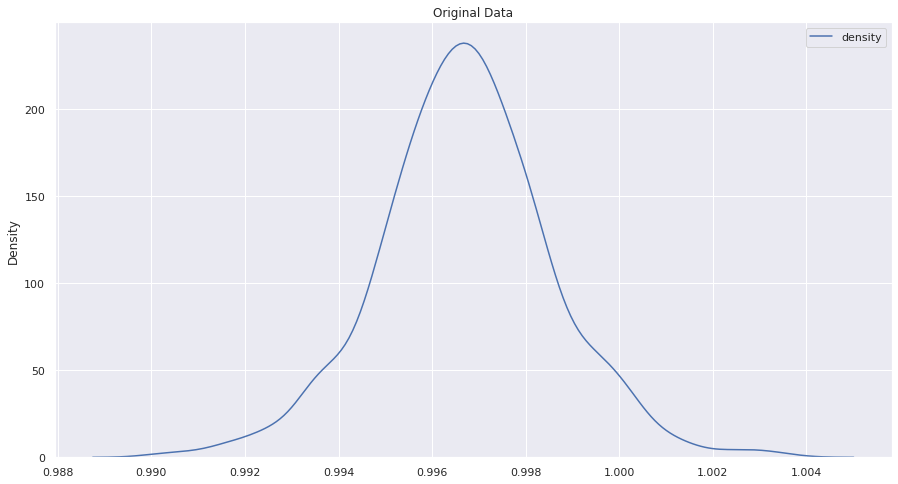

In [14]:
#show the original data
fig, ax = plt.subplots()
sea.kdeplot(data = data_wine[['density']]).set_title('Original Data')
sea.set(rc = {'figure.figsize':(15,8)})
plt.show()

In [15]:
(data_wine < 0).sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Text(0.5, 1.0, 'Normalized Data')

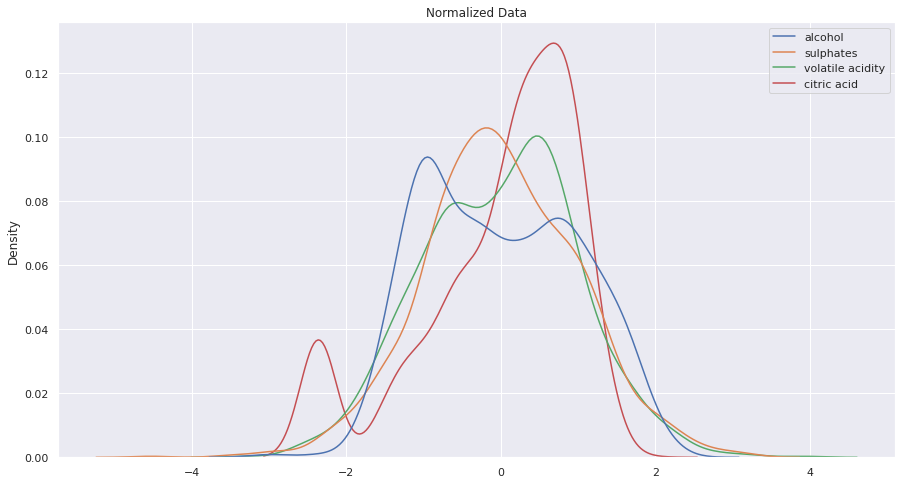

In [16]:
#use the power transformer to normalize
pt = preprocessing.PowerTransformer(method='box-cox')
data_temp = data_wine[['quality', 'alcohol','sulphates', 'volatile acidity','citric acid']].drop(['quality'], axis = 1)+.00000001
data_norm = data_wine[['quality', 'alcohol','sulphates', 'volatile acidity','citric acid']].drop(['quality'],axis=1)

data_norm.iloc[:,:] = pt.fit_transform(data_temp) 


sea.kdeplot(data = data_norm).set_title('Normalized Data')



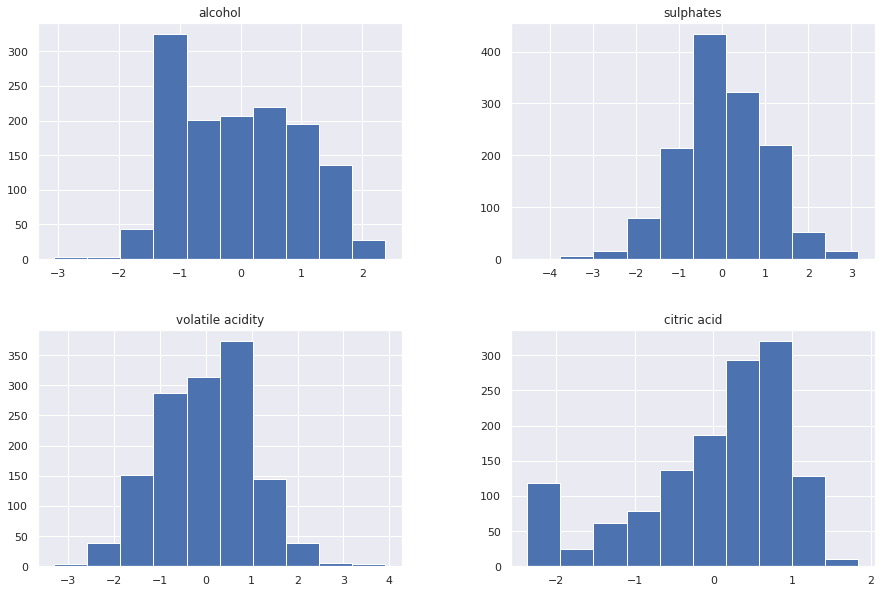

In [17]:
data_norm.hist(figsize=(15,10))
plt.show()

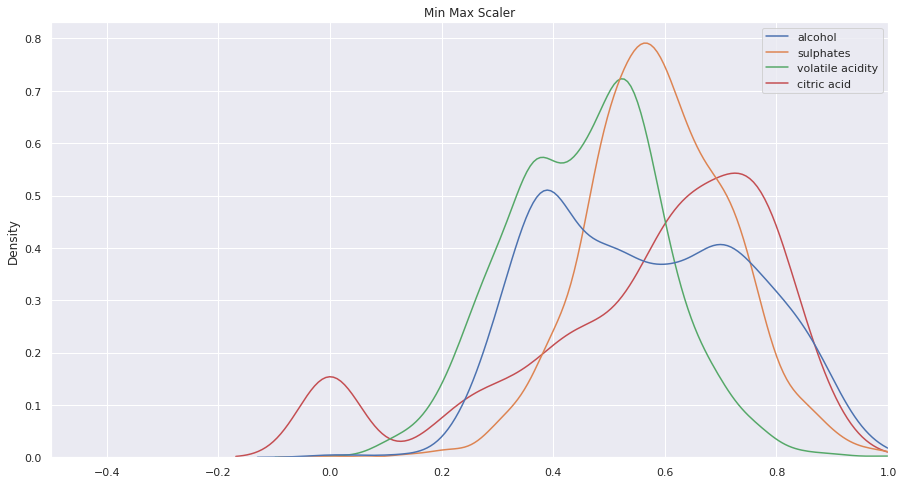

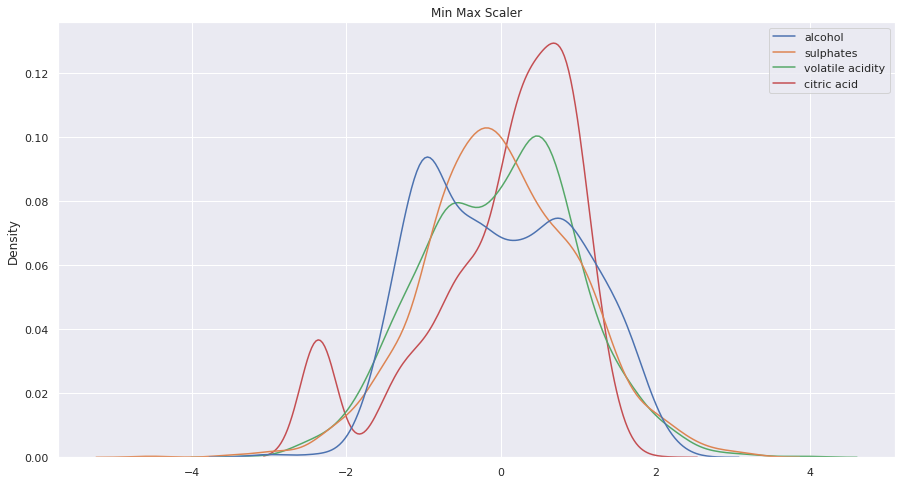

In [18]:
scaler_mms = MinMaxScaler()

# transform data
data_mmsN = data_norm.copy()
data_mmsN.iloc[:,:] = scaler_mms.fit_transform(data_mmsN)
fig, ax = plt.subplots()
sea.kdeplot(data = data_mmsN).set_title('Min Max Scaler')
ax.set_xlim(-.5,1)
sea.set(rc = {'figure.figsize':(15,8)})
plt.show()


scaler_ss = StandardScaler()

# transform data
data_ssN = data_norm.copy()
data_ssN.iloc[:,:] = scaler_ss.fit_transform(data_ssN)
fig, ax = plt.subplots()
sea.kdeplot(data = data_ssN).set_title('Min Max Scaler')
sea.set(rc = {'figure.figsize':(15,8)})
plt.show()

##outlier removal


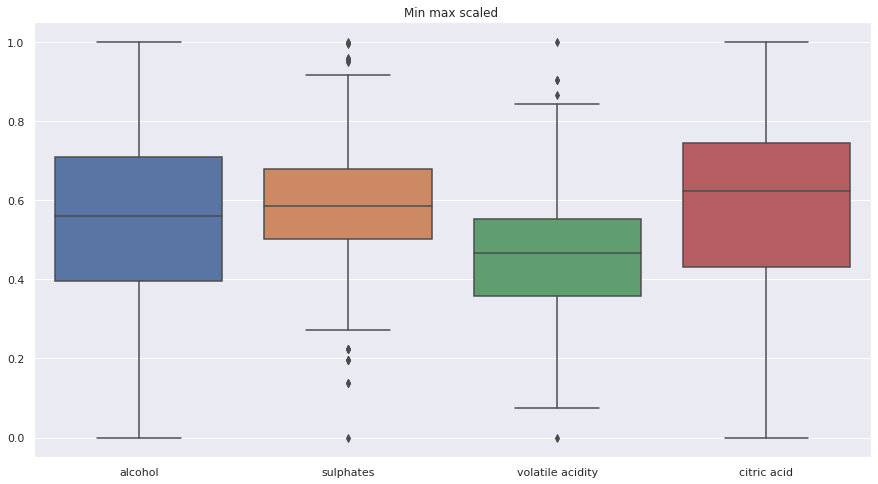

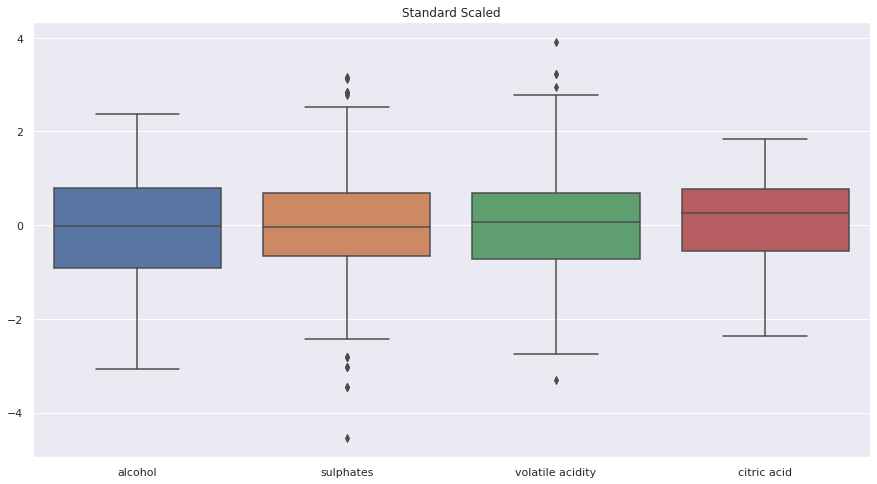

False

In [19]:
fig, ax = plt.subplots()
sea.boxplot(data=data_mmsN).set_title('Min max scaled ')

sea.set(rc = {'figure.figsize':(15,8)})
plt.show()

fig, ax = plt.subplots()
sea.boxplot(data = data_ssN).set_title('Standard Scaled')

sea.set(rc = {'figure.figsize':(15,8)})
plt.show()
data_mmsN.equals(data_ssN)

In [20]:
display(data_ssN.shape)
display(data_mmsN.shape)

(1359, 4)

(1359, 4)

In [21]:
data_ssN['quality'] = data_wine['quality']

for i in data_ssN.iloc[:,:4].columns:
 q_low = data_ssN[i].quantile(0.01)
 q_hi  = data_ssN[i].quantile(0.99)
 data_ssN = data_ssN[(data_ssN[i] < q_hi) & (data_ssN[i] > q_low)]
 data_mmsN.equals(data_ssN)
data_ssN.head()

alcohol  sulphates  volatile acidity  citric acid  quality
2 -0.498177   0.190458          1.226282    -0.998302        5
3 -0.498177  -0.374852         -1.550394     1.067626        6
6 -1.068129  -1.773935          0.486546    -0.790436        5
8 -0.915802  -0.467671          0.384978    -1.292220        7
9  0.287321   1.051985         -0.046924     0.577388        5

In [22]:
data_mmsN['quality'] = data_wine['quality']

for i in data_mmsN.iloc[:,:4].columns:
 q_low = data_mmsN[i].quantile(0.01)
 q_hi  = data_mmsN[i].quantile(0.99)
 data_mmsN = data_mmsN[(data_mmsN[i] < q_hi) & (data_mmsN[i] > q_low)]
 data_mmsN.equals(data_ssN)

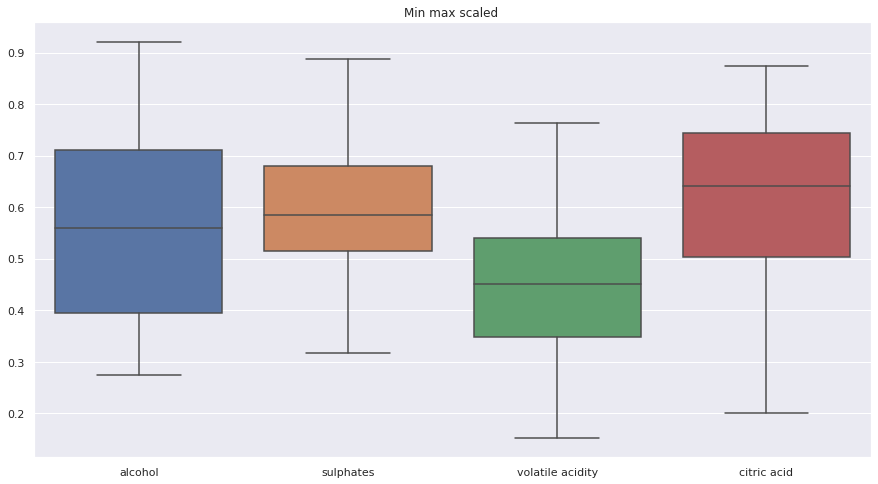

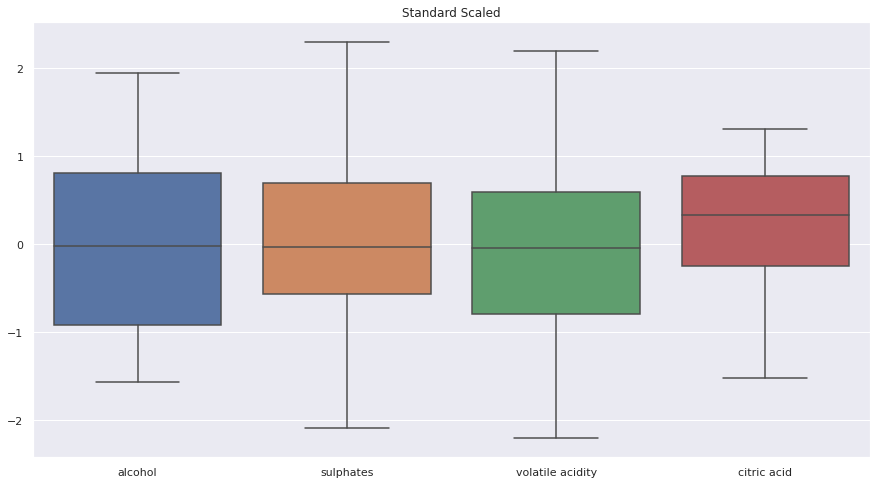

In [23]:
fig, ax = plt.subplots()
sea.boxplot(data=data_mmsN.drop('quality', axis = 1)).set_title('Min max scaled ')

sea.set(rc = {'figure.figsize':(15,8)})
plt.show()

fig, ax = plt.subplots()
sea.boxplot(data = data_ssN.drop('quality', axis = 1)).set_title('Standard Scaled')

sea.set(rc = {'figure.figsize':(15,8)})
plt.show()



Here we can now see the data is normalied and without outliers

<Figure size 720x576 with 0 Axes>

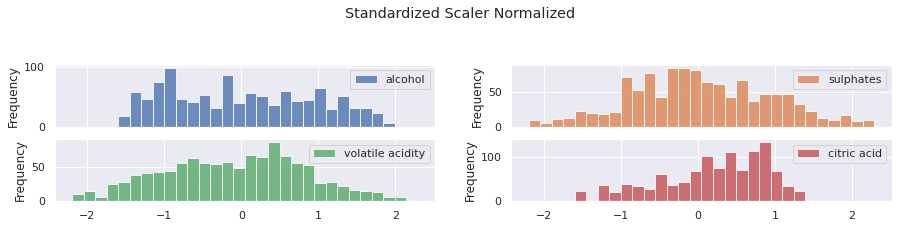

<Figure size 720x576 with 0 Axes>

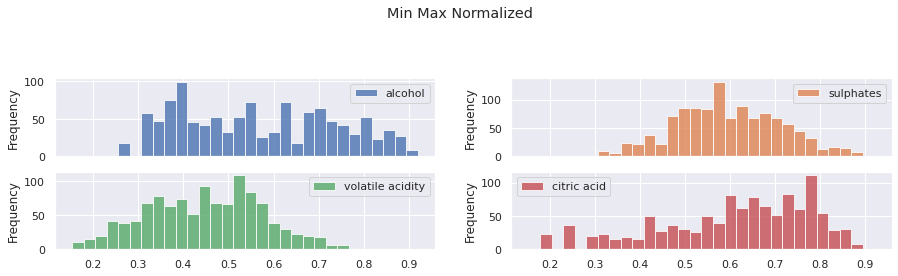

In [24]:
plt.figure(figsize=(10,8))
data_ssN.drop('quality', axis = 1).plot(kind='hist', alpha=0.8,bins=30, subplots=True,layout=(6,2),legend=True, title = 'Standardized Scaler Normalized')
sea.set(rc = {'figure.figsize':(15,10)})

plt.show()

plt.figure(figsize=(10,8))
data_mmsN.drop('quality', axis = 1).plot(kind='hist', alpha=0.8,bins=30, subplots=True,layout=(6,2),legend=True, title = 'Min Max Normalized')
sea.set(rc = {'figure.figsize':(15,10)})
plt.show()

In [25]:
data_mmsN.head()

alcohol  sulphates  volatile acidity  citric acid  quality
2  0.472000   0.613828          0.628160     0.324658        5
3  0.472000   0.540355          0.242915     0.816769        6
6  0.367325   0.358518          0.525527     0.374173        5
8  0.395300   0.528292          0.511435     0.254646        7
9  0.616261   0.725800          0.451511     0.699992        5

In [26]:
X = data_mmsN.drop('quality', axis =1 )
y = data_mmsN['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
y.head()
y_train.shape
X_train.shape

(844, 4)

In [27]:
log_reg_params = [ {"C":0.01,"class_weight":'balanced'}, {"C":0.1,"class_weight":'balanced'}, {"C":1,"class_weight":'balanced'}, {"C":10,"class_weight":'balanced'}, {"class_weight":'balanced'} ]

dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
rand_for_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
kneighbors_params = [{"n_neighbors":3}, {"n_neighbors":5}]
naive_bayes_params = [{}]
svc_params = [{"C":0.01,"class_weight":'balanced'}, {"C":0.1,"class_weight":'balanced'}, {"C":1,"class_weight":'balanced'}, {"C":10,"class_weight":'balanced'},{"class_weight":'balanced'}]
 
modelclasses = [
    ["log regression", LogisticRegression, log_reg_params],
    ["decision tree", DecisionTreeClassifier, dec_tree_params],
    ["random forest", RandomForestClassifier, rand_for_params],
    ["k neighbors", KNeighborsClassifier, kneighbors_params],
    ["naive bayes", GaussianNB, naive_bayes_params],
    ["support vector machines", SVC, svc_params]
]

insights = []
for modelname, Model, params_list in modelclasses:
    for params in params_list:
        model = Model(**params)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        insights.append((modelname, model, params, score))

insights.sort(key=lambda x:x[-1], reverse=True)
for modelname, model, params, score in insights:
    print(modelname, params, score)

naive bayes {} 0.5673758865248227
random forest {'criterion': 'entropy'} 0.5460992907801419
random forest {'criterion': 'gini'} 0.5425531914893617
decision tree {'criterion': 'entropy'} 0.5035460992907801
decision tree {'criterion': 'gini'} 0.5
k neighbors {'n_neighbors': 5} 0.48226950354609927
k neighbors {'n_neighbors': 3} 0.4787234042553192
support vector machines {'C': 10, 'class_weight': 'balanced'} 0.4432624113475177
support vector machines {'C': 0.1, 'class_weight': 'balanced'} 0.3971631205673759
support vector machines {'C': 1, 'class_weight': 'balanced'} 0.3829787234042553
support vector machines {'class_weight': 'balanced'} 0.3829787234042553
log regression {'C': 10, 'class_weight': 'balanced'} 0.31560283687943264
log regression {'C': 1, 'class_weight': 'balanced'} 0.30851063829787234
log regression {'class_weight': 'balanced'} 0.30851063829787234
log regression {'C': 0.1, 'class_weight': 'balanced'} 0.2801418439716312
log regression {'C': 0.01, 'class_weight': 'balanced'} 0.

In [28]:
X = data_ssN.drop('quality', axis =1 )
y = data_ssN['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
y.head()
y_train.shape
X_train.shape

(844, 4)

In [29]:
log_reg_params = [ {"C":0.01}, {"C":0.1}, {"C":1}, {"C":10} ]
log_reg_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
rand_for_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
kneighbors_params = [{"n_neighbors":3}, {"n_neighbors":5}]
naive_bayes_params = [{}]
svc_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
 
modelclasses = [
    ["log regression", LogisticRegression, log_reg_params],
    ["decision tree", DecisionTreeClassifier, dec_tree_params],
    ["random forest", RandomForestClassifier, rand_for_params],
    ["k neighbors", KNeighborsClassifier, kneighbors_params],
    ["naive bayes", GaussianNB, naive_bayes_params],
    ["support vector machines", SVC, svc_params]
]

insights = []
for modelname, Model, params_list in modelclasses:
    for params in params_list:
        model = Model(**params)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        insights.append((modelname, model, params, score))

insights.sort(key=lambda x:x[-1], reverse=True)
for modelname, model, params, score in insights:
    print(modelname, params, score)

naive bayes {} 0.5673758865248227
log regression {'C': 1} 0.5602836879432624
support vector machines {'C': 0.1} 0.5567375886524822
log regression {'C': 0.1} 0.5531914893617021
log regression {'C': 10} 0.549645390070922
support vector machines {'C': 10} 0.549645390070922
random forest {'criterion': 'entropy'} 0.5460992907801419
support vector machines {'C': 1} 0.5460992907801419
random forest {'criterion': 'gini'} 0.5425531914893617
log regression {'C': 0.01} 0.5354609929078015
k neighbors {'n_neighbors': 5} 0.5177304964539007
support vector machines {'C': 0.01} 0.5177304964539007
decision tree {'criterion': 'gini'} 0.5035460992907801
decision tree {'criterion': 'entropy'} 0.5
k neighbors {'n_neighbors': 3} 0.4716312056737589


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

knn_result = knn.fit(X_train, y_train).score(X_test, y_test)
GBC_result = GradientBoostingClassifier().fit(X_train, y_train).score(X_test, y_test)
LinearRegression_result = LinearRegression().fit(X_train, y_train).score(X_test, y_test)
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))
print("knn: " + str(knn_result) + " gbc: " + str(GBC_result), " linear regression: " + str(LinearRegression_result))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         9
           5       0.68      0.72      0.70       120
           6       0.47      0.56      0.51       101
           7       0.55      0.35      0.43        48
           8       0.00      0.00      0.00         3

    accuracy                           0.57       282
   macro avg       0.28      0.27      0.27       282
weighted avg       0.55      0.57      0.55       282

knn: 0.5177304964539007 gbc: 0.5354609929078015  linear regression: 0.34039267764903025


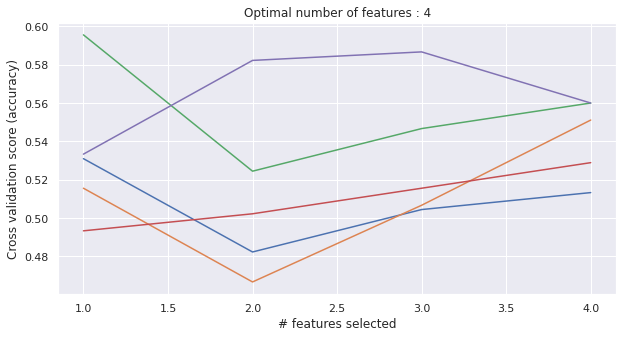

optimal number of features: 4
Best Features: Index(['alcohol', 'sulphates', 'volatile acidity', 'citric acid'], dtype='object')


Rank
alcohol              1
sulphates            1
volatile acidity     1
citric acid          1

In [31]:
from sklearn.model_selection import StratifiedKFold
gbc = GradientBoostingClassifier()
rfecv = RFECV(
    estimator=gbc,
    cv=5,
    step=1,
    scoring="accuracy",
    min_features_to_select=1
)
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))

plt.xlabel("# features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
sea.set(rc = {'figure.figsize':(15,8)})
plt.show()
print("optimal number of features: {}".format(rfecv.n_features_))
print("Best Features:",X_train.columns[rfecv.support_])
rfecv_df = pd.DataFrame(rfecv.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
rfecv_df.head(10)

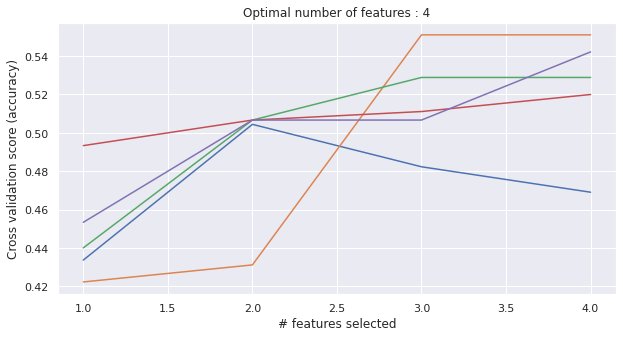

optimal number of features: 4
Best Features: Index(['alcohol', 'sulphates', 'volatile acidity', 'citric acid'], dtype='object')


Rank
alcohol              1
sulphates            1
volatile acidity     1
citric acid          1

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rfecv = RFECV(estimator=rf, 
        step=1,
        cv=5,
    scoring="accuracy",
    min_features_to_select=1
              )
rfecv.fit(X, y)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("# features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
sea.set(rc = {'figure.figsize':(15,8)})
plt.show()
print("optimal number of features: {}".format(rfecv.n_features_))
print("Best Features:",X_train.columns[rfecv.support_])
rfecv_df = pd.DataFrame(rfecv.ranking_, index=X.columns, columns = ['Rank']).sort_values(by='Rank', ascending=True)
rfecv_df.head(10)

the explained variance are: [0.64649767 0.03371056 0.02216065 0.01080939 0.00812245]
the explained variance ratio's are: [0.89629424 0.04673579 0.03072318 0.01498596 0.01126083]
Variance for 1st component is:89.6% & 2nd component is:4.7%
Variance for 3rd component is:3.1% & 4th component is:1.5%


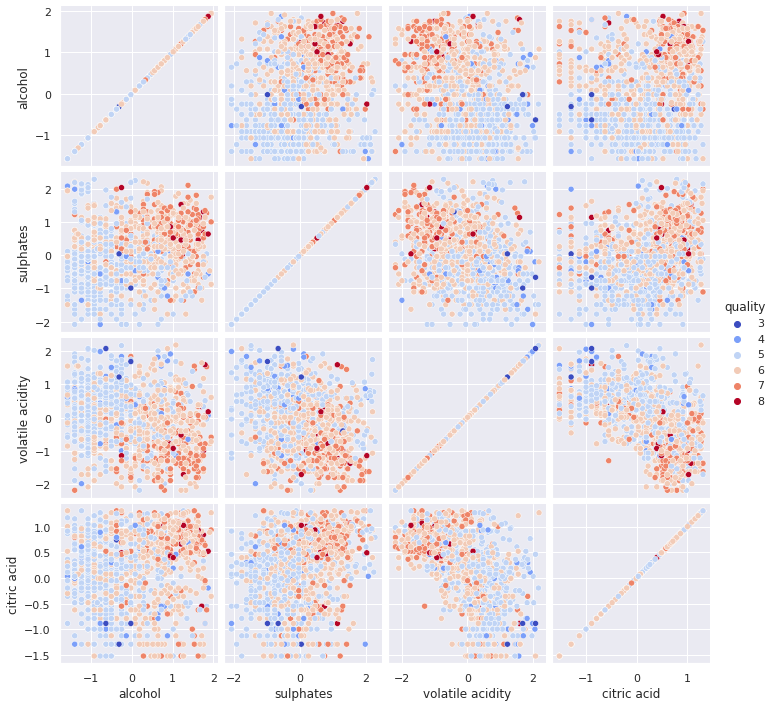

In [33]:
pca4 = PCA(n_components=5).fit(data_mmsN)
pca4d = pca4.transform(data_mmsN)

print("the explained variance are:",pca4.explained_variance_)
print("the explained variance ratio's are:",pca4.explained_variance_ratio_)
print("Variance for 1st component is:"+'{:.1%}'.format(pca4.explained_variance_ratio_[0])+ " & 2nd component is:"+'{:.1%}'.format(pca4.explained_variance_ratio_[1]))
print("Variance for 3rd component is:"+'{:.1%}'.format(pca4.explained_variance_ratio_[2])+ " & 4th component is:"+'{:.1%}'.format(pca4.explained_variance_ratio_[3]))
sea.pairplot(data_ssN, diag_kind=None, hue="quality", palette = 'coolwarm')
plt.show()

the explained variance are: [1.67984599 0.78892879 0.60634159 0.34129594 0.2484515 ]
the explained variance ratio's are: [0.45836519 0.21526824 0.16544724 0.0931265  0.06779283]
Variance for 1st component is:45.8% & 2nd component is:21.5%
Variance for 3rd component is:16.5% & 4th component is:9.3%


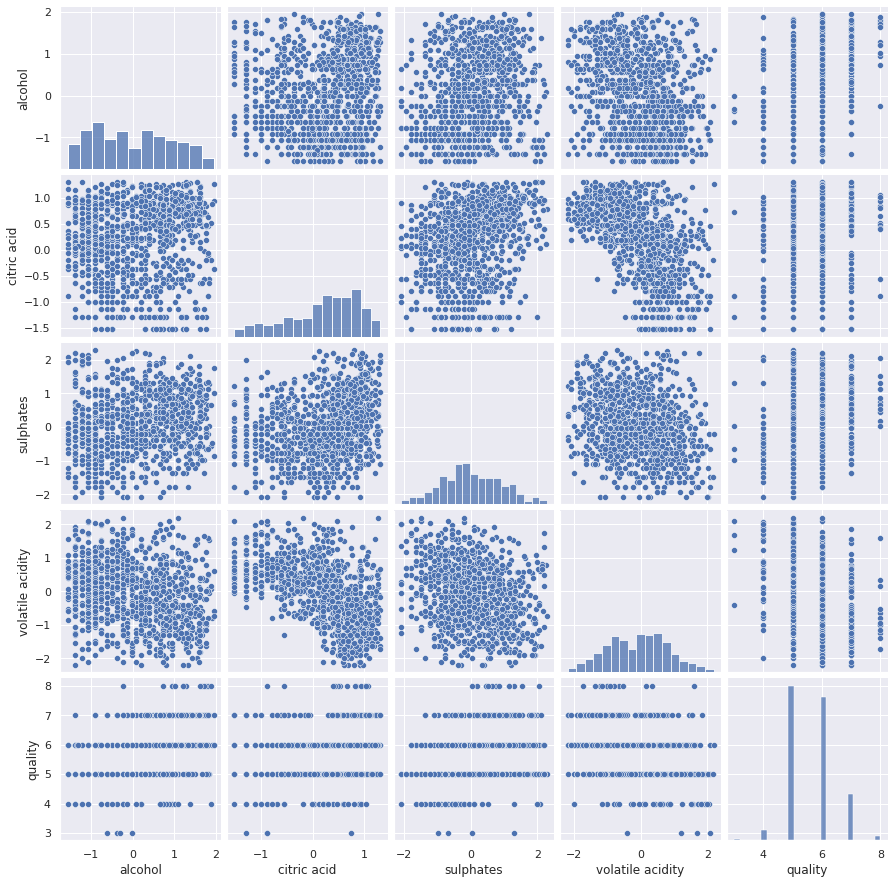

In [34]:
pca4 = PCA(n_components=5).fit(data_ssN)
pca4d = pca4.transform(data_ssN)

print("the explained variance are:",pca4.explained_variance_)
print("the explained variance ratio's are:",pca4.explained_variance_ratio_)
print("Variance for 1st component is:"+'{:.1%}'.format(pca4.explained_variance_ratio_[0])+ " & 2nd component is:"+'{:.1%}'.format(pca4.explained_variance_ratio_[1]))
print("Variance for 3rd component is:"+'{:.1%}'.format(pca4.explained_variance_ratio_[2])+ " & 4th component is:"+'{:.1%}'.format(pca4.explained_variance_ratio_[3]))
sea.pairplot(data_ssN[['alcohol','citric acid', 'sulphates','volatile acidity', 'quality' ]], palette = 'coolwarm')
plt.show()

### Modeling

*TODO*
<li>Implement Multivariable Linear Regression using any 2 Regression algorithms of your choice</li>
<li>Implement a Neural Network using Tensorflow and Keras to classify wine quality</li>

In [35]:
X = data_ssN[['alcohol','citric acid', 'sulphates','volatile acidity' ]]
y = data_ssN['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
y.head()
y_train.shape
X_train.shape

(844, 4)

In [36]:
log_reg_params = [ {"C":0.01}, {"C":0.1}, {"C":1}, {"C":10} ]
log_reg_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
rand_for_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
kneighbors_params = [{"n_neighbors":3}, {"n_neighbors":5}]
naive_bayes_params = [{}]
svc_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]

modelclasses = [
    ["log regression", LogisticRegression, log_reg_params],
    ["decision tree", DecisionTreeClassifier, dec_tree_params],
    ["random forest", RandomForestClassifier, rand_for_params],
    ["k neighbors", KNeighborsClassifier, kneighbors_params],
    ["naive bayes", GaussianNB, naive_bayes_params],
    ["support vector machines", SVC, svc_params]
]

insights = []
for modelname, Model, params_list in modelclasses:
    for params in params_list:
        model = Model(**params)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        insights.append((modelname, model, params, score))

insights.sort(key=lambda x:x[-1], reverse=True)
for modelname, model, params, score in insights:
    print(modelname, params, score)

naive bayes {} 0.5673758865248227
log regression {'C': 1} 0.5602836879432624
support vector machines {'C': 0.1} 0.5567375886524822
log regression {'C': 0.1} 0.5531914893617021
log regression {'C': 10} 0.549645390070922
support vector machines {'C': 10} 0.549645390070922
support vector machines {'C': 1} 0.5460992907801419
random forest {'criterion': 'entropy'} 0.5425531914893617
random forest {'criterion': 'gini'} 0.5390070921985816
log regression {'C': 0.01} 0.5354609929078015
k neighbors {'n_neighbors': 5} 0.5177304964539007
support vector machines {'C': 0.01} 0.5177304964539007
decision tree {'criterion': 'gini'} 0.5035460992907801
decision tree {'criterion': 'entropy'} 0.4929078014184397
k neighbors {'n_neighbors': 3} 0.4716312056737589


In [37]:
#linear regression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
#multiple linear regression


In [39]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

In [40]:
#neural network
X = data_ssN[['alcohol','citric acid', 'sulphates','volatile acidity']]
y = data_ssN['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
y.head()
y_train.shape
X_train.shape

ann = Sequential()
ann.add(tf.keras.layers.Input(shape = 4,))
ann.add(tf.keras.layers.Dense(32,activation = 'relu'))
ann.add(tf.keras.layers.Dense(64,activation = 'relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(128,activation = 'relu'))
ann.add(tf.keras.layers.Dense(256,activation = 'relu'))
ann.add(tf.keras.layers.Dropout(0.3))
ann.add(tf.keras.layers.Dense(6,activation = 'softmax'))

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = pd.DataFrame(y_train.reshape(len(y_train),1))
y_test = pd.DataFrame(y_test.reshape(len(y_test),1))
y_train = tf.keras.utils.to_categorical(y_train,6)
y_test = tf.keras.utils.to_categorical(y_test,6)

ann.compile(optimizer= 'adam',loss = 'categorical_crossentropy', metrics = 'accuracy')

history = ann.fit(X_train,y_train, validation_split=0.3,epochs =30, verbose =0)



In [41]:
y_pred = ann.predict(X_test)
y_pred = [np.round(value) for value in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         9
           2       0.67      0.74      0.70       120
           3       0.44      0.45      0.44       101
           4       0.46      0.12      0.20        48
           5       0.00      0.00      0.00         3

   micro avg       0.56      0.50      0.53       282
   macro avg       0.26      0.22      0.22       282
weighted avg       0.52      0.50      0.49       282
 samples avg       0.50      0.50      0.50       282



### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

*TODO*

**For Regression models**
<li>Use three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>
<li>Compare these 3 metrics for the two models and analyze the performance</li>
<li>Calculate the feature importance scores for the top features that help predicting wine quality and visualize them</li>

**For Classification model**
<li> Plot training loss and validation loss </li>
<li> Plot training accuracy and validation accuracy </li>
<li> Evaluate the classsification model using Precision, Recall and Accuracy metrics </li>

In [42]:
X = data_ssN[['alcohol','citric acid', 'sulphates','volatile acidity' ]]
y = data_ssN['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)
y.head()
y_train.shape
X_train.shape

(844, 4)

In [43]:
print('Random Forest:')
score = rfr.score(X_train, y_train)
print("R-squared:", score) 
mse = mean_squared_error(y_test, rfr_pred)
mae = mean_absolute_error(y_test, rfr_pred)
print("MAE: ", mae)
print("RMSE: ", math.sqrt(mse))

Random Forest:
R-squared: 0.9032311820062933
MAE:  0.5463008274231678
RMSE:  0.6943336001135556


In [44]:
print('Decision Tree:')
score = dtr.score(X_train, y_train)
print("R-squared:", score) 
dtr_pred = dtr.predict(X_test)

mse = mean_squared_error(y_test, dtr_pred)
mae = mean_absolute_error(y_test, dtr_pred)
print("MAE: ", mae)
print("RMSE: ", math.sqrt(mse))

Decision Tree:
R-squared: 0.9990271207384661
MAE:  0.648936170212766
RMSE:  0.9509234034079381


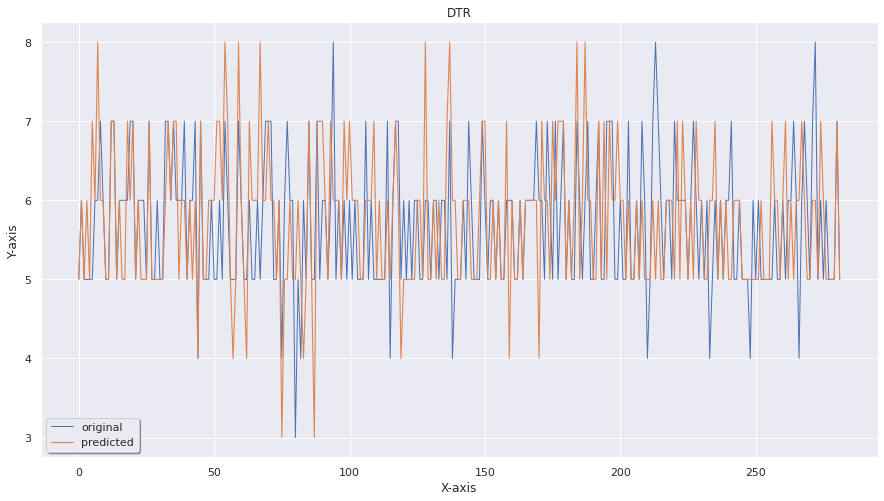

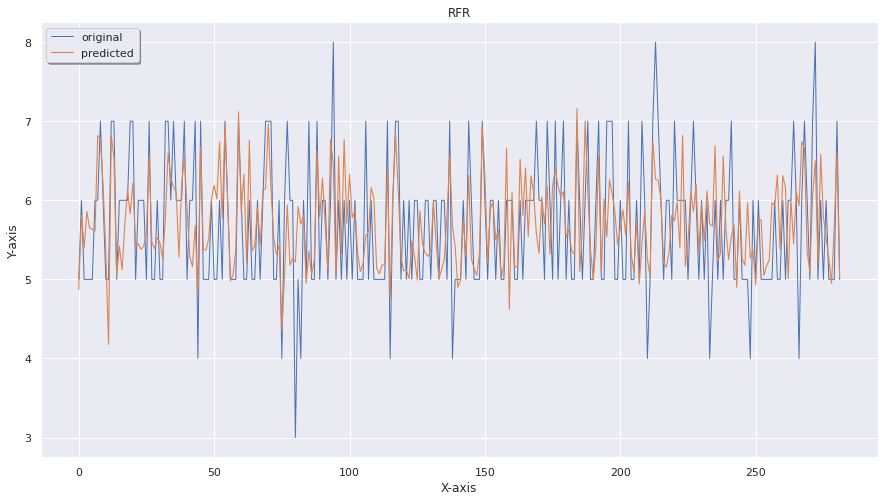

In [45]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, dtr_pred, linewidth=1.1, label="predicted")
plt.title("DTR")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, rfr_pred, linewidth=1.1, label="predicted")
plt.title("RFR")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

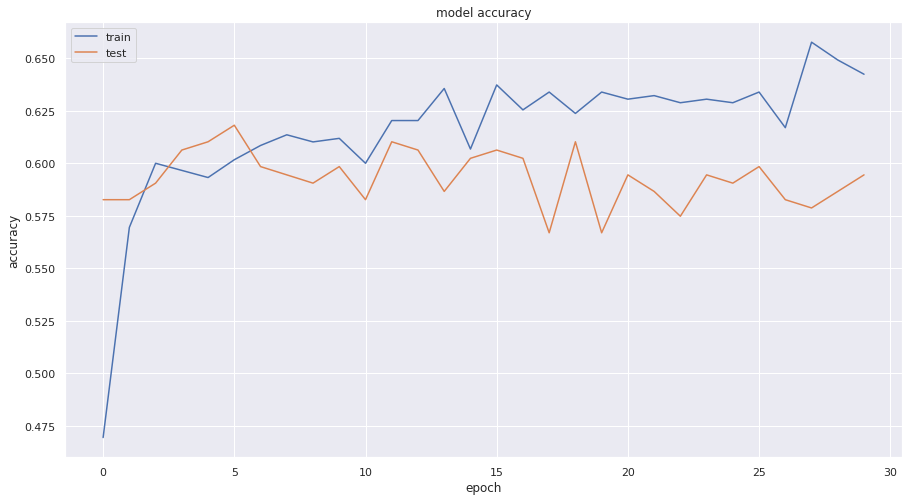

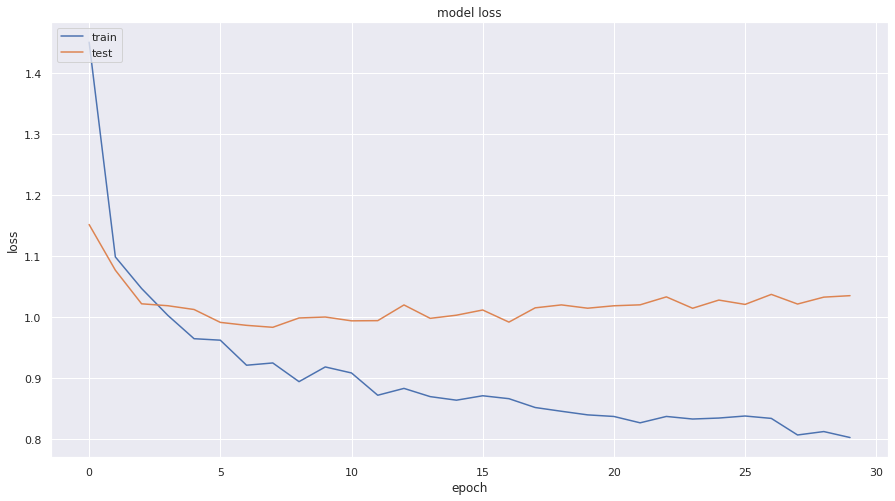

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Conclusion

*TODO*